### Group Members:  Jo Ann Elias, Mariko Falke  &  Marcia Cosgrove

# UCD Bootcamp Visualization Project 

Data Source: https://data.world/awram/us-mass-shootings


#  (E) - Data Extraction

* Import Needed Libraries
* Load Excel File
* Read Excel File & Store in Dataframe

In [2]:
#####  *** Set Up ***  #####

### Import Dependencies
import pandas as pd
import numpy as np
import datetime as dt

### Python SQL Toolkit & Object Relational Mapper (ORM)
import psycopg2
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func

### Display Options - Set Dataframe to Show All Columns in Output Window
pd.set_option("display.max_columns", None)


In [3]:
### File to Load 
US_Shooting_data = "Resources/US_Mass_Shootings_Data_1982_2019.xlsx"

### Read Excel Files & Store in Pandas Dataframes
US_Shooting_df = pd.read_excel(US_Shooting_data, encoding='unicode_escape')

In [4]:
#### Check Dataframe Datatypes
# US_Shooting.dtypes

#### Display Dataframe
US_Shooting_df.head()

,case,location,date,summary,fatalities,injured,total_victims,location.1,age_of_shooter,prior_signs_mental_health_issues,mental_health_details,weapons_obtained_legally,where_obtained,weapon_type,weapon_details,race,gender,sources,mental_health_sources,sources_additional_age,latitude,longitude,type,year
0,Molson Coors shooting,"Milwaukee, Wisconsin",2020-02-26,"Anthony Ferrill, 51, an employee armed with tw...",5,0,5,Workplace,51,-,-,-,-,semiautomatic handgun,-,Black,M,https://www.jsonline.com/story/news/local/2020...,-,-,43.044511,-87.962537,Mass,2020
1,Jersey City kosher market shooting,"Jersey City, New Jersey",2019-12-10,"David N. Anderson, 47, and Francine Graham, 50...",4,3,7,Other,-,-,-,-,-,-,-,Black,-,https://www.nytimes.com/2019/12/15/nyregion/je...,-,-,40.707363,-74.083609,Spree,2019
2,Pensacola Naval base shooting,"Pensacola, Florida",2019-12-06,"Ahmed Mohammed al-Shamrani, A Saudi Arabian mi...",3,8,11,Military,-,-,-,-,-,semiautomatic handgun,-,-,M,https://www.washingtonpost.com/national-securi...,-,-,30.364707,-87.288567,Mass,2019
3,Odessa-Midland shooting spree,"Odessa, Texas",2019-08-31,"Seth A. Ator, 36, fired at police officers who...",7,25,32,Other,36,yes,"""One friend of the family said the gunman had ...",-,-,semiautomatic rifle,-,White,M,https://www.washingtonpost.com/politics/5-kill...,https://www.nytimes.com/2019/09/02/us/texas-gu...,-,31.925974,-102.279600,Spree,2019
4,Dayton entertainment district shooting,"Dayton, Ohio",2019-08-04,"Connor Betts, 24, died during the attack, foll...",9,27,36,Other,24,-,-,Yes,-,semiautomatic rifle,"AR-15-style rifle, with a 100-round capacity a...",White,M,https://www.nytimes.com/2019/08/04/us/dayton-o...,-,-,39.757312,-84.184947,Mass,2019


In [5]:
#### Display Statistical Summary
US_Shooting_df.describe()

,fatalities,injured,total_victims,latitude,longitude,year
count,118.000000,118.000000,118.000000,118.000000,118.000000,118.000000
mean,8.076271,12.228814,20.305085,37.346087,-96.510846,2008.152542
std,7.943343,50.678712,56.258334,5.763058,17.997837,10.421565
min,3.000000,0.000000,3.000000,21.320063,-157.876462,1982.000000
25%,5.000000,1.000000,7.000000,33.605188,-117.219188,1999.000000
50%,6.000000,3.500000,10.500000,38.323367,-90.537585,2012.000000
75%,8.750000,10.750000,18.000000,41.518935,-81.314759,2017.000000
max,58.000000,546.000000,604.000000,48.461367,-71.075913,2020.000000


# (T) - Data Transformation

* Drop Columns that are Not Needed
* Create Columns that are Needed
* Reorder Columns 
* Recode Field Values for Consistency & Analysis


In [6]:
#### Drop Columns that Aren't Needed (we are not doing text analysis, so dropping notes fields/string fields)
US_Shooting_df = US_Shooting_df.drop(columns=["mental_health_details", "summary", "where_obtained", "weapon_details", 
                                      "mental_health_sources", "sources_additional_age", "type", "weapon_type",
                                       "prior_signs_mental_health_issues", "weapons_obtained_legally"], axis=1)

#### Create Additional Date Field
US_Shooting_df["month"] = US_Shooting_df["date"].dt.month


#### Rename One of the "Location"  Fields (dataset came with two location fields) 
US_Shooting_df = US_Shooting_df.rename(columns={"location": "city_state", 
                                          "location.1": "site"})

#### Reorder Dataframe
US_Shooting_df = US_Shooting_df[["case", "city_state", "site",
                           "date", "month", "year",
                           "injured", "fatalities","total_victims",
                          "age_of_shooter", "race",
                          "gender", "longitude", "latitude"]]

#### Display Dataframe
US_Shooting_df.head()

,case,city_state,site,date,month,year,injured,fatalities,total_victims,age_of_shooter,race,gender,longitude,latitude
0,Molson Coors shooting,"Milwaukee, Wisconsin",Workplace,2020-02-26,2,2020,0,5,5,51,Black,M,-87.962537,43.044511
1,Jersey City kosher market shooting,"Jersey City, New Jersey",Other,2019-12-10,12,2019,3,4,7,-,Black,-,-74.083609,40.707363
2,Pensacola Naval base shooting,"Pensacola, Florida",Military,2019-12-06,12,2019,8,3,11,-,-,M,-87.288567,30.364707
3,Odessa-Midland shooting spree,"Odessa, Texas",Other,2019-08-31,8,2019,25,7,32,36,White,M,-102.279600,31.925974
4,Dayton entertainment district shooting,"Dayton, Ohio",Other,2019-08-04,8,2019,27,9,36,24,White,M,-84.184947,39.757312


In [7]:
#####  *** Recode Fields for Consistency & Analysis  ***  #####

### Recode "age_of_shooter"
US_Shooting_df["age_of_shooter"].replace({"-": 0}, inplace=True)

### Recode "race"
US_Shooting_df["race"].replace({"-": "Other/Unknown", 
                              "unclear": "Other/Unknown",
                              "Other":  "Other/Unknown",
                              "White ": "White",
                              "white": "White",
                               "black": "Black"}, inplace=True)


### Recode "gender"
US_Shooting_df["gender"].replace({"-": "Other/Unknown", 
                              "Male & Female": "Other/Unknown",
                              "F":  "Female",
                              "M": "Male"}, inplace=True)

### Recode "site"
## This isn't recoding correctly, go back and revisit
US_Shooting_df["site"].replace({"Other\n ": "Other", 
                              "\nWorkplace ": "Workplace"}, inplace=True)


In [8]:
#### Display Dataframe
US_Shooting_df.head()

,case,city_state,site,date,month,year,injured,fatalities,total_victims,age_of_shooter,race,gender,longitude,latitude
0,Molson Coors shooting,"Milwaukee, Wisconsin",Workplace,2020-02-26,2,2020,0,5,5,51,Black,Male,-87.962537,43.044511
1,Jersey City kosher market shooting,"Jersey City, New Jersey",Other,2019-12-10,12,2019,3,4,7,0,Black,Other/Unknown,-74.083609,40.707363
2,Pensacola Naval base shooting,"Pensacola, Florida",Military,2019-12-06,12,2019,8,3,11,0,Other/Unknown,Male,-87.288567,30.364707
3,Odessa-Midland shooting spree,"Odessa, Texas",Other,2019-08-31,8,2019,25,7,32,36,White,Male,-102.279600,31.925974
4,Dayton entertainment district shooting,"Dayton, Ohio",Other,2019-08-04,8,2019,27,9,36,24,White,Male,-84.184947,39.757312


# (L) - Data Load

* Create Engine & Connection Layer to Database
* Use Pandas to Load CSV Converted Dataframe to PostgreSQL DB
* Create a Session (link) from Python to PostgreSQL DB


## Prior to Executing the Following Code, Set Up PostgreSQL Database

* Using pgAdim, create a new database named "Mass_Shootings" (right-click on Databases in left menu list, create "database")
* Click on the new database and navigate under "Schemas" > "Public" > "Tables" and create a new table named "Mass_Shootings" (right-click, create "table")
* Navigate to "Columns", right-click and create "column". A new pop up window will display and you need to fill out the following elements:<br>

    1) "General Tab" > "Name" -  name as it appears in the list below<br>
    2) "Definition Tab" > "Data Type" - type is shown in list below<br>
    3) Repeat the addition of columns for entire list (14 columns total)


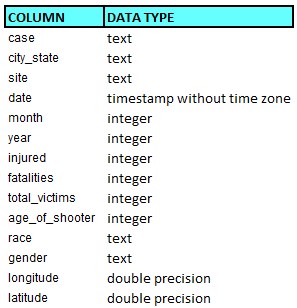

In [9]:
from IPython.display import Image
Image("Resources/Mass_Shootings_Columns.png")

In [10]:
# ##### ***  Create Engine & Connection Layer ***  #####
# connection_string = "postgres:Skyriot12!@localhost:5432/Mass_Shootings"
# engine = create_engine(f'postgresql://{connection_string}')
# connection = engine.connect()

In [ ]:
engine = sqlalchemy.create_engine

In [11]:
##### *** Use Pandas to Load CSV Converted Dataframe into Database *** #####
US_Shooting_df.to_sql(name="Mass_Shootings", con=engine, if_exists="replace", index=False)

In [12]:
### Check Table Loaded to Database
engine.table_names()

['Mass_Shootings']

In [13]:
##### ***  Create Our Session (link) from Python to the Database ***  #####
session = Session(engine)

In [14]:
### Confirm data has been added by querying the database
pd.read_sql_table("Mass_Shootings", con=engine).head()

,case,city_state,site,date,month,year,injured,fatalities,total_victims,age_of_shooter,race,gender,longitude,latitude
0,Molson Coors shooting,"Milwaukee, Wisconsin",Workplace,2020-02-26,2,2020,0,5,5,51,Black,Male,-87.962537,43.044511
1,Jersey City kosher market shooting,"Jersey City, New Jersey",Other,2019-12-10,12,2019,3,4,7,0,Black,Other/Unknown,-74.083609,40.707363
2,Pensacola Naval base shooting,"Pensacola, Florida",Military,2019-12-06,12,2019,8,3,11,0,Other/Unknown,Male,-87.288567,30.364707
3,Odessa-Midland shooting spree,"Odessa, Texas",Other,2019-08-31,8,2019,25,7,32,36,White,Male,-102.279600,31.925974
4,Dayton entertainment district shooting,"Dayton, Ohio",Other,2019-08-04,8,2019,27,9,36,24,White,Male,-84.184947,39.757312


### NOTE:  In order to review the data in pgAdmin, you will need to right-click on the Mass_Shootings database in pgAdmin and select "refresh" the database.